# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


In [3]:
np.random.seed(777)

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [136]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [137]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [138]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [139]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [140]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [141]:
#dropping some data I no longer need
df.drop(['starttime','stoptime','start station name','end station name','usertype','date'],axis=1,inplace=True)
df.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
0,1346,455,40.750020,-73.969053,265,40.722293,-73.991475,18660,1960.0,2,NaN,55.0
1,363,434,40.743174,-74.003664,482,40.739355,-73.999318,16085,1963.0,1,52.0,NaN
2,346,491,40.740964,-73.986022,505,40.749013,-73.988484,20845,1974.0,1,41.0,NaN
3,182,384,40.683178,-73.965964,399,40.688515,-73.964763,19610,1969.0,1,46.0,NaN
4,969,474,40.745168,-73.986831,432,40.726218,-73.983799,20197,1977.0,1,38.0,NaN


In [142]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,227764.000000,52093.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,40.305272,38.951145
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,11.595240,11.405112
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000,17.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000,31.000000,30.000000
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,1977.000000,1.000000,39.000000,37.000000
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,1984.000000,1.000000,48.000000,48.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000,89.000000


In [143]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

In [144]:
len(df)

285552

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

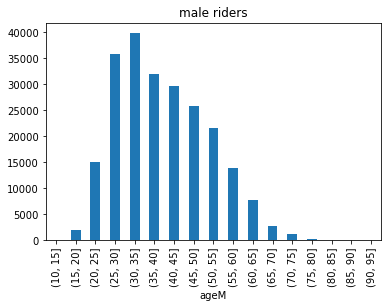

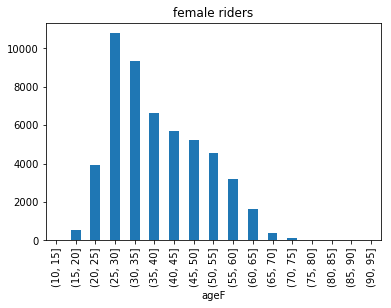

In [145]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **
here is where you should have a nice caption that describes what I am looking at, why I am looking at it, and what I should notice

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]            NaN
(90, 95]            NaN


/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


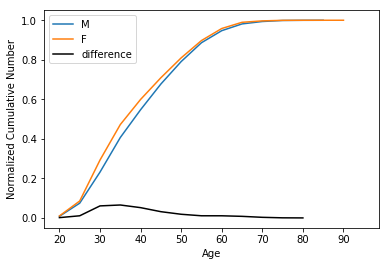

In [146]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** ... [a good caption here]

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [147]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [148]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageF[~np.isnan(df.ageF)])
print (ks)

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)


**  FILL IN THE CELL BELOW!**

# For scipy KS test, the default Null hypothesis is that two data is the same distribution, as it returned the significance and p-value. Here in this one is the age distribution is the same or drawn from the same distribution for man and woman. Since the p-value here is really small, the NULL Hypothesis can be rejected, also means age distribution is different between man and woman.
##this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
##to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [149]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
#from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

In [156]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
#Now redo the test with a reducted set of the sample of the data: take 1 ride of every 100
#redu_df = df.loc[::200]
#reducedIndex = int(len(df)/200)
#redu_df = df.loc[np.random.permutation(reducedIndex)]
redu_df = df.sample(n=int(len(df)/200),random_state=500)
redu_df.head()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
239527,147,488,40.756458,-73.993722,477,40.756405,-73.990026,14760,1959.0,1,56.0,NaN
209611,546,489,40.750664,-74.001768,474,40.745168,-73.986831,18417,1966.0,2,NaN,49.0
221003,222,284,40.739017,-74.002638,470,40.743453,-74.000040,18561,1969.0,1,46.0,NaN
206920,421,490,40.751551,-73.993934,173,40.760647,-73.984427,21203,1974.0,1,41.0,NaN
174988,697,477,40.756405,-73.990026,537,40.740259,-73.984092,21497,1963.0,1,52.0,NaN


In [157]:
len(redu_df)

1427

In [158]:
# dropping NaN values
redu_df['ageM'].dropna(inplace= True)
redu_df['ageF'].dropna(inplace= True)

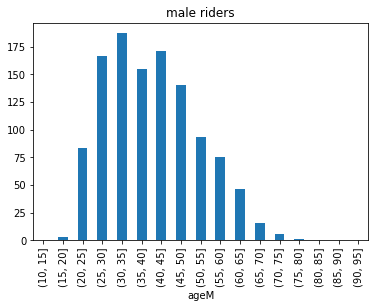

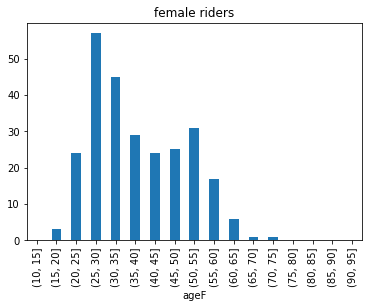

In [159]:
# plotting histogramswith pandas is a bitdifferent than with pylab
bins = np.arange(10, 99, 5)
axM = redu_df.ageM.groupby(pd.cut(redu_df.ageM, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axM.set_title('male riders')
axF = redu_df.ageF.groupby(pd.cut(redu_df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',legend=False)
axF.set_title('female riders')

/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


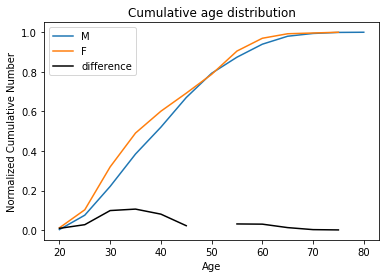

In [160]:
csM=redu_df.ageM.groupby(pd.cut(redu_df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=redu_df.ageF.groupby(pd.cut(redu_df.ageF, bins)).agg([count_nonzero]).cumsum()


pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.title("Cumulative age distribution")
pl.legend()

In [161]:
ks =scipy.stats.ks_2samp(redu_df.ageM[~np.isnan(redu_df.ageM)], redu_df.ageF[~np.isnan(redu_df.ageF)])
print(ks)

Ks_2sampResult(statistic=0.10641730620174378, pvalue=0.014491332225202996)


# P-value increases after we use reducted data, but the result still have p < 0.05, therefore the null hypothesis is rejected, we can say the age distribution is different between male and female. 

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



**
Null hypothesis:
H_0:There is no correlation between male and female age distribution

Alternative hypothesis:
H_a:There is corrlation between male and female age distribution


In [60]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
len(df)


285552

In [61]:
ageM_mod = np.array(df.ageM.dropna())
ageF_mod = np.array(df.ageF.dropna())
ageM_mod = sorted(ageM_mod[np.random.permutation(50000)])
ageF_mod = sorted(ageF_mod[np.random.permutation(50000)])

In [62]:
scipy.stats.pearsonr(ageM_mod, ageF_mod)

(0.99585561768402309, 0.0)

# The output has two parts, first one of the returns is Pearson’s correlation coefficient and the second one is the p-value which is a 2-tailed p-value.

# P-value way too small, we can reject the null hypothesis There is a correlation between male and female age distribution and the coefficient is 0.996, also the linear correlation is very strong.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

Null hypothesis:
H_0:There is no correlation between male and female age distribution

Alternative hypothesis:
H_a:There is corrlation between male and female age distribution



In [63]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
scipy.stats.spearmanr(ageM_mod, ageF_mod)

SpearmanrResult(correlation=0.99912701099843759, pvalue=0.0)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

#  The output has two parts, first one is the Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. like this example case. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.second one is the two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated. From this pvalue we know this NULL can be rejected.

# Next, we will see another exercise of test bike usage in daytime and night time. Null hypothesis H0: daytime use and nighttime use are the same distribution. 

In [162]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [163]:
df2['date'] = pd.to_datetime(df2['starttime'])

In [164]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [165]:
df2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [166]:
df2.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],axis=1,inplace=True)
df2.head()

,tripduration,date
0,1346,2015-01-01 00:01:00
1,363,2015-01-01 00:02:00
2,346,2015-01-01 00:04:00
3,182,2015-01-01 00:04:00
4,969,2015-01-01 00:05:00


In [167]:
#extract hour information
df2['hour'] = df2.date.dt.hour
df2['timeshift'] = df2.hour.apply(lambda x:'day' if ((x>=6) &(x<18)) else 'night')

In [168]:
df2.head()

,tripduration,date,hour,timeshift
0,1346,2015-01-01 00:01:00,0,night
1,363,2015-01-01 00:02:00,0,night
2,346,2015-01-01 00:04:00,0,night
3,182,2015-01-01 00:04:00,0,night
4,969,2015-01-01 00:05:00,0,night


In [169]:
df2.drop(['date','hour'],axis=1,inplace=True)
df2.head()

,tripduration,timeshift
0,1346,night
1,363,night
2,346,night
3,182,night
4,969,night


In [170]:
# K-S test
daytime = df2['tripduration'][df2.timeshift=='day']
nighttime = df2['tripduration'][df2.timeshift=='night']
ks = scipy.stats.ks_2samp(daytime, nighttime)
print (ks)

Ks_2sampResult(statistic=0.028733318889103798, pvalue=3.5979814502564027e-42)


# Here since the p-value here is really small, the NULL Hypothesis can be rejected, it means daytime and nighttime usage distribution is different.

In [173]:
redu_df2 = df2.loc[::200]
#reducedIndex2 = int(len(df2)/200)
#redu_df2 = df2.loc[np.random.permutation(reducedIndex2)]

#redu_df2 = df2.sample(n=int(len(df2)/200),random_state=500)
redu_df2.head()

,tripduration,timeshift
0,1346,night
200,571,night
400,364,night
600,284,day
800,650,day


In [174]:
# K-S test for reducted dataset
daytime2 = redu_df2['tripduration'][redu_df2.timeshift=='day']
nighttime2 = redu_df2['tripduration'][redu_df2.timeshift=='night']
ks = scipy.stats.ks_2samp(daytime2, nighttime2)
print (ks)

Ks_2sampResult(statistic=0.095871225156239859, pvalue=0.0087756900115703255)


# Even with reducted sample size the NULL Hypothesis is also can be rejected which means age distribution is different between man and woman.

#  The null hypothes is there is no correlation between daytime use and nightime use distribution.

In [175]:
#pearson's test
daytime_mod = np.array(daytime.dropna())
nighttime_mod = np.array(nighttime.dropna())
daytime_mod = sorted(daytime_mod[np.random.permutation(80000)])
nighttime_mod = sorted(nighttime_mod[np.random.permutation(80000)])
scipy.stats.pearsonr(daytime_mod, nighttime_mod)

(0.95634673097620304, 0.0)

# P-value way too small, almost as zero, we can reject the null hypothesis. And there is a correlation between daytime use and nightime use distribution and  the linear correlation is very strong.

In [76]:
#spearman's test
scipy.stats.spearmanr(daytime_mod, nighttime_mod)

SpearmanrResult(correlation=0.99999860735277113, pvalue=0.0)

# P-value way too small, almost as zero, we can reject the null hypothesis. And there is a correlation between daytime use and nightime use distribution and  the linear correlation is very strong.

# Let us check another month's data, since it is the same as steps above we will skip some data visual steps like .head() etc.

In [182]:
datestring = '201507'
getCitiBikeCSV(datestring)

file in place, you can continue


In [184]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2['date'] = pd.to_datetime(df2['starttime'])
df2.drop(['starttime', 'stoptime', 'start station id',

       'start station name', 'start station latitude',

       'start station longitude', 'end station id', 'end station name',

       'end station latitude', 'end station longitude', 'bikeid', 'usertype',

       'birth year', 'gender'],axis=1,inplace=True)

df2['hour'] = df2.date.dt.hour

df2['timeshift'] = df2.hour.apply(lambda x:'day' if ((x>=6) &(x<18)) else 'night')

df2.drop(['date','hour'],axis=1,inplace=True)

# K-S test

daytime = df2['tripduration'][df2.timeshift=='day']

nighttime = df2['tripduration'][df2.timeshift=='night']

ks = scipy.stats.ks_2samp(daytime, nighttime)

print (ks)

Ks_2sampResult(statistic=0.026127186464933283, pvalue=1.2658488254505565e-143)


In [185]:
#K-s on reduced dataset
redu_df2 = df2.loc[::200]

daytime2 = redu_df2['tripduration'][redu_df2.timeshift=='day']

nighttime2 = redu_df2['tripduration'][redu_df2.timeshift=='night']

ks = scipy.stats.ks_2samp(daytime2, nighttime2)

print (ks)

Ks_2sampResult(statistic=0.039324519571042993, pvalue=0.046507045330423713)


In [186]:
#pearson test
daytime_mod = np.array(daytime.dropna())

nighttime_mod = np.array(nighttime.dropna())

daytime_mod = sorted(daytime_mod[np.random.permutation(80000)])

nighttime_mod = sorted(nighttime_mod[np.random.permutation(80000)])

scipy.stats.pearsonr(daytime_mod, nighttime_mod)

(0.92904440295828827, 0.0)

In [187]:
#spearman test
scipy.stats.spearmanr(daytime_mod, nighttime_mod)

SpearmanrResult(correlation=0.99999945705593829, pvalue=0.0)

# We can see the result from summer data is the same as winter, we can reject all the H0 hypothesis. The day and night usage have different distribution but have strong correlation with each other.

# the 3rd exercise was help by zz1749 to get the location information exported from ARCGIS 

In [195]:
#load data
datestring = '201501'
getCitiBikeCSV(datestring)
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [196]:
df3['age'] = 2015 - df3['birth year'][df3['usertype'] == 'Subscriber']
df3.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],axis=1,inplace=True)
df3.head()

,age
0,55.0
1,52.0
2,41.0
3,46.0
4,38.0


In [201]:
BK_index = pd.read_csv('BK1.csv').OID
MN_index = pd.read_csv('MN1.csv').OID
print(BK_index.head())
print(MN_index.head())

0      3
1     48
2     61
3     62
4    174
Name: OID, dtype: int64
0     33
1     46
2     59
3     60
4    101
Name: OID, dtype: int64


In [206]:
df3_BK = df3.iloc[BK_index,:][['age']].dropna()
df3_MN = df3.iloc[MN_index,:][['age']].dropna()

In [219]:
df3_BK = df3_BK.reset_index(drop=True)
df3_BK.head()

,age
0,46.0
1,34.0
2,27.0
3,27.0
4,63.0


In [220]:
df3_MN = df3_MN.reset_index(drop=True)
df3_MN.head()

,age
0,47.0
1,47.0
2,46.0
3,30.0
4,27.0


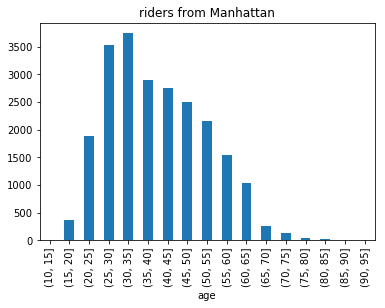

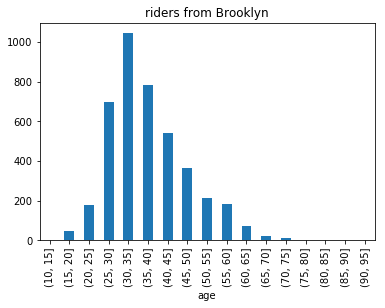

In [221]:
bins = np.arange(10, 99, 5)
axMn = df3_MN.age.groupby(pd.cut(df3_MN.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axMn.set_title("riders from Manhattan")
axBk = df3_BK.age.groupby(pd.cut(df3_BK.age, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axBk.set_title("riders from Brooklyn");

          count_nonzero
age                    
(10, 15]            NaN
(15, 20]       0.004744
(20, 25]       0.044383
(25, 30]       0.030764
(30, 35]       0.056795
(35, 40]       0.118633
(40, 45]       0.128990
(45, 50]       0.107111
(50, 55]       0.064521
(55, 60]       0.041456
(60, 65]       0.012682
(65, 70]       0.005816
(70, 75]       0.002602
(75, 80]       0.001137
(80, 85]            NaN
(85, 90]            NaN
(90, 95]            NaN


/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


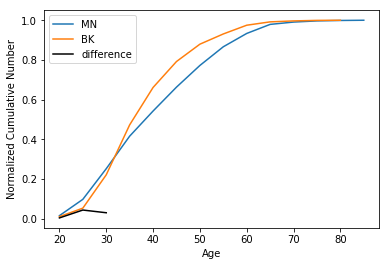

In [222]:
csMN=df3_MN.age.groupby(pd.cut(df3_MN.age,bins)).agg([count_nonzero]).cumsum()

csBK=df3_BK.age.groupby(pd.cut(df3_BK.age,bins)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(bins[:-1] + 5, csMN / csMN.max(), label = "MN")
pl.plot(bins[:-1] + 5, csBK / csBK.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.sqrt(csMN / csMN.max()-csBK / csBK.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Null hypothesis is that trip originated from Manhattan and originated from Brooklyn have the same distributions 

In [223]:
#K-S
ks = scipy.stats.ks_2samp(df3_MN.age,df3_BK.age)
print(ks)

Ks_2sampResult(statistic=0.13327368524527516, pvalue=6.4069848485925137e-55)


# Here since the p-value here is really small, the NULL Hypothesis can be rejected, it means trips originated from Manhattan and trips originated from Brooklyn distribution is different.

In [228]:
#K-s on reduced dataset
redu_df3_MN = df3_MN.sample(n=int(len(df3_MN)/200),random_state=500)
redu_df3_BK = df3_BK.sample(n=int(len(df3_BK)/200),random_state=500)

In [229]:
ks = scipy.stats.ks_2samp(redu_df3_MN.age, redu_df3_BK.age)
print (ks)

Ks_2sampResult(statistic=0.20701754385964913, pvalue=0.41477973647129801)


# the p-value now is much higher than 0.05, the NULL Hypothesis can't be rejected, it means by this sample test we can't say trips originated from Manhattan and trips originated from Brooklyn distribution is different.

In [ ]:
#correlation test

#  The null hypothesis There is no correlation between trips originated from Manhattan and trips originated from Brooklyn distribution.

In [236]:
#pearson test
df3_MN_mod = np.array(df3_MN['age'].dropna())

df3_BK_mod = np.array(df3_BK['age'].dropna())

df3_MN_mod = sorted(df3_MN_mod[np.random.permutation(4000)])

df3_BK_mod = sorted(df3_BK_mod[np.random.permutation(4000)])

scipy.stats.pearsonr(df3_MN_mod, df3_BK_mod)

(0.98919452352256765, 0.0)

# P-value way too small, almost as zero, we can reject the null hypothesis There is a correlation between trips originated from Manhattan and trips originated from Brooklyn distribution and  the linear correlation is very strong.

# Null hypothesis is that two sets of data: trips originated from Manhattan and trips originated from Brooklyn distribution are uncorrelated

In [239]:
#spearman test
scipy.stats.spearmanr(df3_MN_mod, df3_BK_mod)

SpearmanrResult(correlation=0.99893677242200729, pvalue=0.0)

# The two-sided p-value for a hypothesis test whose null hypothesis is that trips originated from Manhattan and trips originated from Brooklyn distribution are uncorrelated. From this pvalue we know this NULL can be rejected.

In [240]:
#retest by using another month's data
datestring = '201507'
getCitiBikeCSV(datestring)
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [241]:
df3['age'] = 2015 - df3['birth year'][df3['usertype'] == 'Subscriber']
df3.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],axis=1,inplace=True)
df3.head()

,age
0,45.0
1,31.0
2,23.0
3,25.0
4,27.0


In [242]:
BK_index = pd.read_csv('BK2.csv').OID
MN_index = pd.read_csv('MN2.csv').OID
print(BK_index.head())
print(MN_index.head())

0     97
1    184
2    233
3    291
4    294
Name: OID, dtype: int64
0     0
1     4
2    22
3    51
4    56
Name: OID, dtype: int64


In [243]:
df3_BK = df3.iloc[BK_index,:][['age']].dropna()
df3_MN = df3.iloc[MN_index,:][['age']].dropna()
df3_BK = df3_BK.reset_index(drop=True)
df3_MN = df3_MN.reset_index(drop=True)

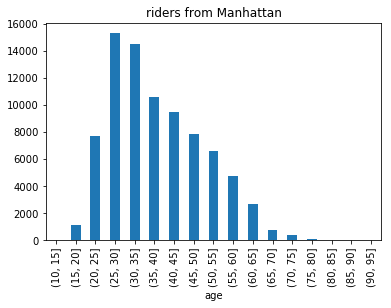

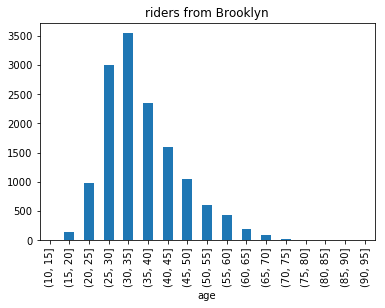

In [244]:
bins = np.arange(10, 99, 5)
axMn = df3_MN.age.groupby(pd.cut(df3_MN.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axMn.set_title("riders from Manhattan")
axBk = df3_BK.age.groupby(pd.cut(df3_BK.age, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axBk.set_title("riders from Brooklyn");

          count_nonzero
age                    
(10, 15]            NaN
(15, 20]       0.002938
(20, 25]       0.026543
(25, 30]       0.000570
(30, 35]       0.075719
(35, 40]       0.113363
(40, 45]       0.111206
(45, 50]       0.089986
(50, 55]       0.052483
(55, 60]       0.026061
(60, 65]       0.006995
(65, 70]       0.003929
(70, 75]       0.001031
(75, 80]       0.000440
(80, 85]            NaN
(85, 90]            NaN
(90, 95]            NaN


/Users/cihe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


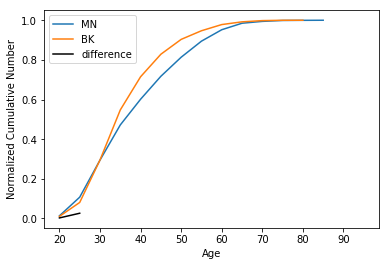

In [245]:
csMN=df3_MN.age.groupby(pd.cut(df3_MN.age,bins)).agg([count_nonzero]).cumsum()

csBK=df3_BK.age.groupby(pd.cut(df3_BK.age,bins)).agg([count_nonzero]).cumsum()

print (np.abs(csMN / csMN.max()-csBK / csBK.max()))

pl.plot(bins[:-1] + 5, csMN / csMN.max(), label = "MN")
pl.plot(bins[:-1] + 5, csBK / csBK.max(), label = "BK")
pl.plot(bins[:-1] + 5, np.sqrt(csMN / csMN.max()-csBK / csBK.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Null hypothesis is that trip originated from Manhattan and originated from Brooklyn have the same distributions

In [246]:
#K-S
ks = scipy.stats.ks_2samp(df3_MN.age,df3_BK.age)
print(ks)

Ks_2sampResult(statistic=0.11983183142916776, pvalue=2.555899819381528e-150)


The p-value here is really small, the NULL Hypothesis can be rejected, it means trips originated from Manhattan and trips originated from Brooklyn distribution is different.

In [ ]:
#reduce dataset size

In [251]:
#K-s on reduced dataset
#redu_df3_MN = df3_MN.sample(n=int(len(df3_MN)/200),random_state=500)
redu_df3_MN = df3_MN.loc[::200]
#redu_df3_BK = df3_BK.sample(n=int(len(df3_BK)/200),random_state=500)
redu_df3_BK = df3_BK.loc[::200]

In [252]:
ks = scipy.stats.ks_2samp(redu_df3_MN.age, redu_df3_BK.age)
print (ks)

Ks_2sampResult(statistic=0.11885949845413946, pvalue=0.33915833531915524)


The p-value now is much higher than 0.05, the NULL Hypothesis can't be rejected, it means by this sample test we can't say trips originated from Manhattan and trips originated from Brooklyn distribution is different.

# The null hypothesis There is no correlation between trips originated from Manhattan and trips originated from Brooklyn distribution.

In [253]:
#pearson test
df3_MN_mod = np.array(df3_MN['age'].dropna())

df3_BK_mod = np.array(df3_BK['age'].dropna())

df3_MN_mod = sorted(df3_MN_mod[np.random.permutation(4000)])

df3_BK_mod = sorted(df3_BK_mod[np.random.permutation(4000)])

scipy.stats.pearsonr(df3_MN_mod, df3_BK_mod)

(0.98215312083671946, 0.0)

# P-value way too small, almost as zero, we can reject the null hypothesis There is a correlation between trips originated from Manhattan and trips originated from Brooklyn distribution and the linear correlation is very strong.

In [ ]:
#H0 same as pearson test

In [254]:
#spearman test
scipy.stats.spearmanr(df3_MN_mod, df3_BK_mod)

SpearmanrResult(correlation=0.99890736856678286, pvalue=0.0)

# The two-sided p-value for a hypothesis test whose null hypothesis is that trips originated from Manhattan and trips originated from Brooklyn distribution are uncorrelated. From this pvalue we know this NULL can be rejected.